In [1]:
# import dependencies
# import sys
# !{sys.executable} -m pip install --user install tensorflow==2.8.0. 
import numpy as np
import pandas as pd
import glacierml as gl
RGI = gl.RGI_loader()
df, ref = gl.notebook_data_loader()

Global Volume: 101.48, UB: 39.16, LB: 42.34, STD: 42.19


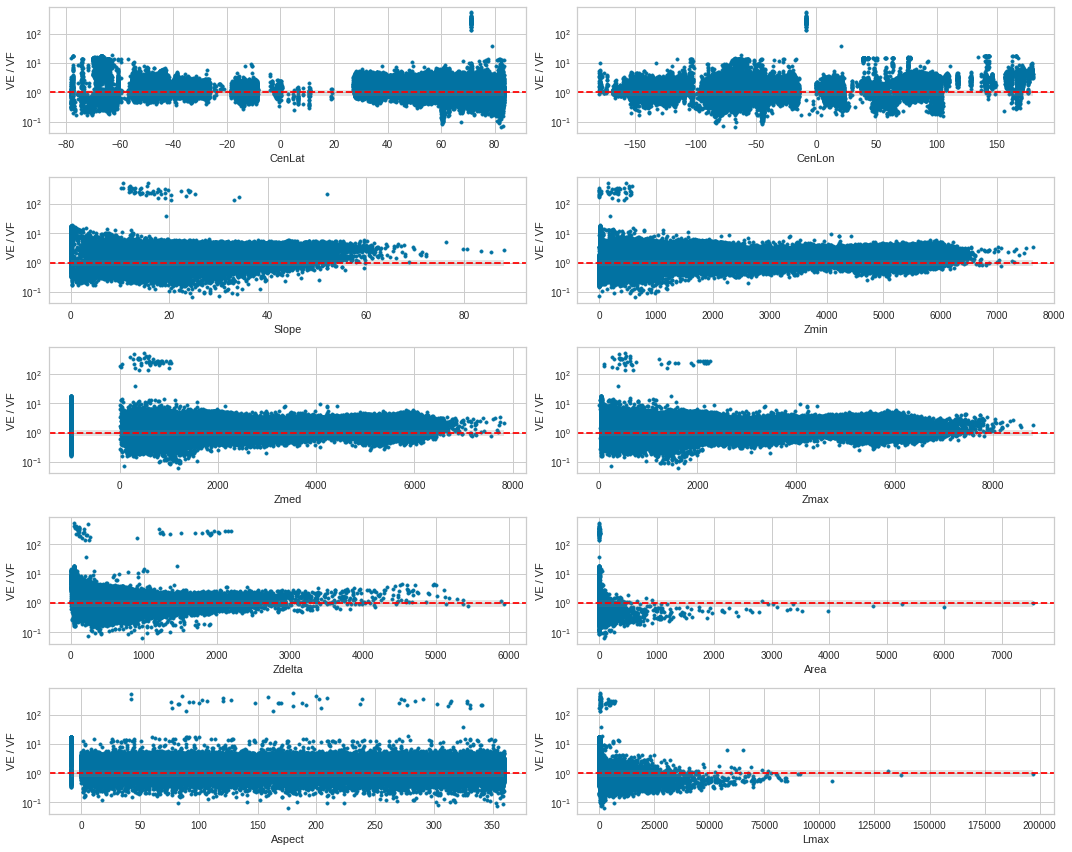

In [2]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
# plt.suptitle('Residuals by RGI feature' + 
#     ',\nLayer Architecture: ' + predictions['architecture'].loc[idx] +
#     ', Learning Rate: ' + predictions['learning rate'].loc[idx], fontsize=18, y=0.99)
fig.patch.set_facecolor('w')
dft = ref[[
    'CenLat',
    'CenLon',
    'Slope',
    'Zmin',
    'Zmed',
    'Zmax',
    'Zdelta',
    'Area',
    'Aspect',
    'Lmax',

]]
for n, variable in enumerate(dft):
    ax = plt.subplot(5, 2, n + 1)
    plt.subplots_adjust(hspace=0.5)
    ax.set_ylabel('VE / VF')
    ax.set_xlabel(variable)
    ax.set_yscale('log')
    plt.scatter(
        dft[variable],
        ref['VE / VF'],
        marker = '.'
    )
    ax.fill_between(
        x = (
            dft[variable].min(), dft[variable].max()
        ),
        y1 = 1.25,
        y2 = 0.75,
        facecolor = 'gray',
        alpha = 0.2
    )
    plt.axhline(y = 1.00, color = 'red', linestyle = '--')

plt.tight_layout()

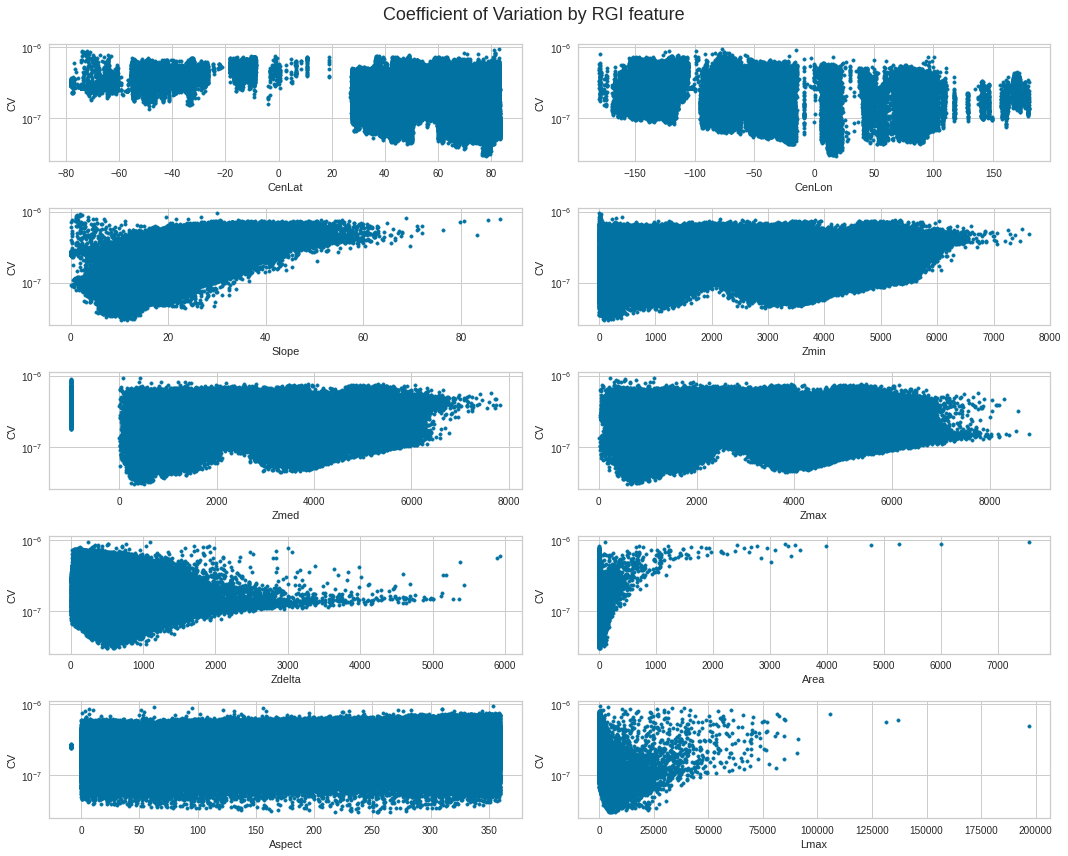

In [3]:
fig = plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Coefficient of Variation by RGI feature' ,
#     ',\nLayer Architecture: ' + predictions['architecture'].loc[idx] +
#     ', Learning Rate: ' + predictions['learning rate'].loc[idx]
              fontsize=18, y=0.99)
fig.patch.set_facecolor('w')
dft = ref[[
    'CenLat',
    'CenLon',
    'Slope',
    'Zmin',
    'Zmed',
    'Zmax',
    'Zdelta',
    'Area',
    'Aspect',
    'Lmax',

]]
# ref['CoV'] = ref
for n, (variable) in (enumerate(dft)):

    ax = plt.subplot(5, 2, n + 1)
    plt.subplots_adjust(hspace=0.5)
    ax.set_ylabel('CV')
    ax.set_xlabel(variable)
    ax.set_yscale('log')
    plt.scatter(
        dft[variable],
        (((ref['Volume Std Dev'] / ref['Area']) / 1e3) / ref['Edasi Mean Thickness']),
        marker = '.'
    )
#     ax.fill_between(
#         x = (
#             dft[variable].min(), dft[variable].max()
#         ),
#         y1 = 1.25,
#         y2 = 0.75,
#         facecolor = 'gray',
#         alpha = 0.2
#     )
#     plt.axhline(y = 1.00, color = 'red', linestyle = '--')

plt.tight_layout()

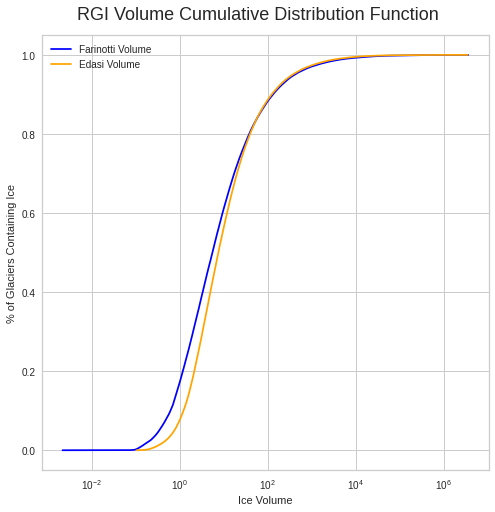

In [4]:
data_1 = ref['Farinotti Mean Thickness'] * ref['Area']
data_2 = ref['Edasi Mean Thickness'] * ref['Area']
#sort data


x_1 = np.sort(data_1)
# x = data_1
#calculate CDF values
y_1 = 1. * np.arange(len(data_1)) / (len(data_1) - 1)


x_2 = np.sort(data_2)
# x = data
#calculate CDF values
y_2 = 1. * np.arange(len(data_2)) / (len(data_2) - 1)

#plot CDF
fig, ax = plt.subplots(1,1,figsize=(8, 8))

plt.subplots_adjust(hspace=0.5)

plt.suptitle('RGI Volume Cumulative Distribution Function', fontsize=18, y=0.93)
fig.patch.set_facecolor('w')


plt.subplots_adjust(hspace=0.5)
plt.plot(
    x_1, 
    y_1,
    c = 'blue',
    label = 'Farinotti Volume'
    
)
plt.plot(
    x_2, 
    y_2,
    c = 'orange',
    label = 'Edasi Volume'
)
plt.legend()
ax.set_xscale('log')
ax.set_xlabel('Ice Volume')
ax.set_ylabel('% of Glaciers Containing Ice')
plt.savefig('figs/cdf/cdf.svg')

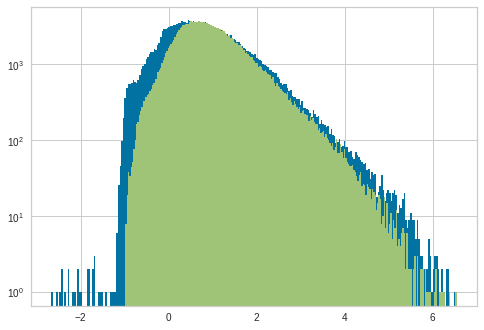

In [5]:
plt.hist(np.log10(data_1), 250)
plt.hist(np.log10(data_2), 250)
plt.yscale('log')
# plt.xlim(0,1e5)
plt.show()

In [6]:
from scipy.interpolate import interp1d

In [7]:
f1 = interp1d(x_1,y_1)
f2 = interp1d(x_2,y_2)

In [8]:
np.log10(x_2.min())

-0.9795398011626495

In [9]:
x = np.logspace(-0.96, 6, 100)
D = np.max(abs(f2(x) - f1(x)))

In [10]:
n = len(x_1)
m = len(x_2)

r = np.sqrt(
    (n+m) / (n*m)
)
(
    ((D / r)**2) * -2 
)

-2827.5884714804856

219690


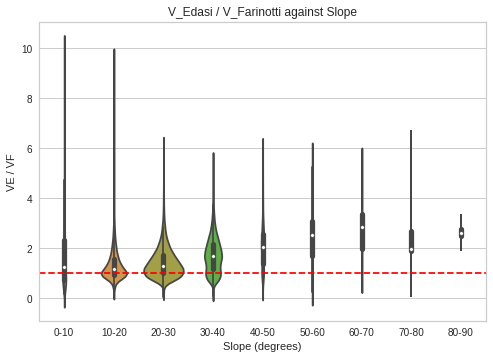

In [11]:
import seaborn as sns
dfr = pd.DataFrame()
for i in range(0, 90, 10):
    dft = ref.loc[(ref['Slope'].between(i, i + 10)) & (ref['VE / VF'] <= 10)]
    dft['Slope (degrees)'] = str(i) + '-' + str(i + 10)
    dfr = pd.concat([dfr, dft])
ax = sns.violinplot(
    x = dfr['Slope (degrees)'],
    y = dfr['VE / VF'],
    scale = 'count',
    inner = 'box'
#     ax = plt.subplot(1,1,(figsize = (10,10)))
)
plt.axhline(y = 1.00, color = 'red', linestyle = '--')
ax.set_title('V_Edasi / V_Farinotti against Slope')
print(len(dfr))
plt.savefig('figs/violin/slope.svg')

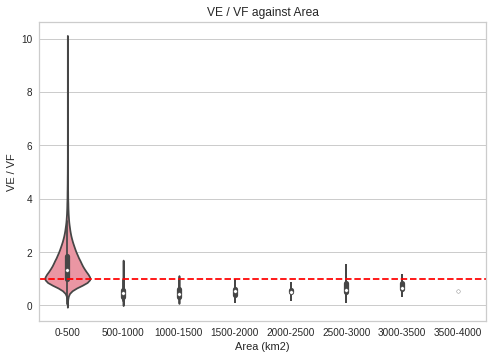

In [12]:
dfr = pd.DataFrame()
for i in range(0, 4000, 500):
    dft = ref.loc[(ref['Area'].between(i, i + 500)) & (ref['VE / VF'] <= 10)]
    dft['Area (km2)'] = str(i) + '-' + str(i + 500)
    dfr = pd.concat([dfr, dft])
ax = sns.violinplot(
    x = dfr['Area (km2)'],
    y = dfr['VE / VF'],
    inner = 'box',
    scale = 'count',
#     inner = None
#     ax = plt.subplot(1,1,(figsize = (10,10)))
)
plt.axhline(y = 1.00, color = 'red', linestyle = '--')
ax.set_title('VE / VF against Area')
plt.savefig('figs/violin/area.svg')

Text(0.5, 1.0, 'VE / VF against Lmax (m)')

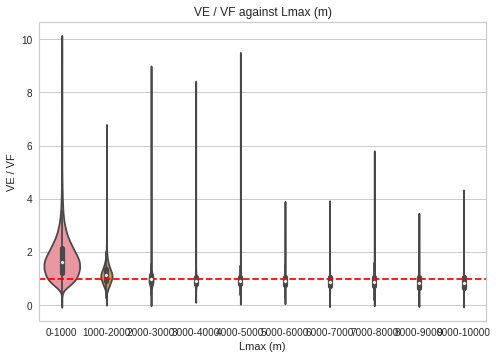

In [13]:
dfr = pd.DataFrame()
for i in range(0, 10000, 1000):
    dft = ref.loc[(ref['Lmax'].between(i, i + 1000)) & (ref['VE / VF'] <= 10)]
    dft['Lmax (m)'] = str(i) + '-' + str(i + 1000)
    dfr = pd.concat([dfr, dft])
ax = sns.violinplot(
    x = dfr['Lmax (m)'],
    y = dfr['VE / VF'],
    scale = 'count',
    inner = 'box'
#     ax = plt.subplot(1,1,(figsize = (10,10)))
)
plt.axhline(y = 1.00, color = 'red', linestyle = '--')
ax.set_title('VE / VF against Lmax (m)')

Text(0.5, 1.0, 'VE / VF against Zmin')

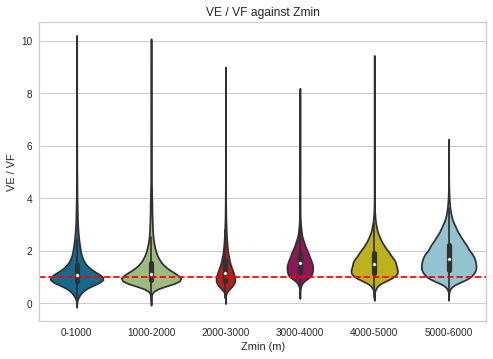

In [14]:
dfr = pd.DataFrame()
for i in range(0, 6000, 1000):
    dft = ref.loc[(ref['Zmin'].between(i, i + 1000)) & (ref['VE / VF'] <= 10)]
    dft['Zmin (m)'] = str(i) + '-' + str(i + 1000)
    dfr = pd.concat([dfr, dft])
ax = sns.violinplot(
    x = dfr['Zmin (m)'],
    y = dfr['VE / VF'],
    scale = 'count',
    
#     ax = plt.subplot(1,1,(figsize = (10,10)))
)
plt.axhline(y = 1.00, color = 'red', linestyle = '--')
ax.set_title('VE / VF against Zmin')


Text(0.5, 1.0, 'VE / VF against Zmed')

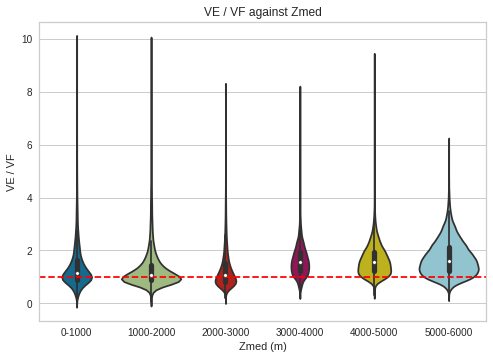

In [15]:
dfr = pd.DataFrame()
for i in range(0, 6000, 1000):
    dft = ref.loc[(ref['Zmed'].between(i, i + 1000)) & (ref['VE / VF'] <= 10)]
    dft['Zmed (m)'] = str(i) + '-' + str(i + 1000)
    dfr = pd.concat([dfr, dft])
ax = sns.violinplot(
    x = dfr['Zmed (m)'],
    y = dfr['VE / VF'],
    scale = 'count'
#     ax = plt.subplot(1,1,(figsize = (10,10)))
)
plt.axhline(y = 1.00, color = 'red', linestyle = '--')
ax.set_title('VE / VF against Zmed')

Text(0.5, 1.0, 'VE / VF against Zmax')

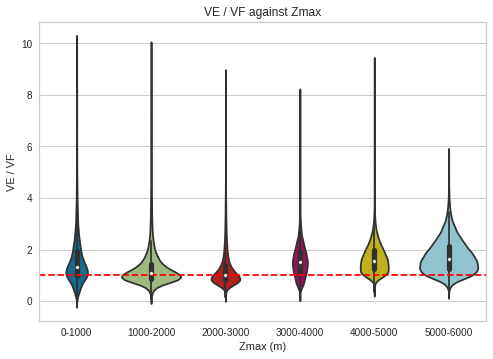

In [16]:
dfr = pd.DataFrame()
for i in range(0, 6000, 1000):
    dft = ref.loc[(ref['Zmax'].between(i, i + 1000)) & (ref['VE / VF'] <= 10)]
    dft['Zmax (m)'] = str(i) + '-' + str(i + 1000)
    dfr = pd.concat([dfr, dft])
ax = sns.violinplot(
    x = dfr['Zmax (m)'],
    y = dfr['VE / VF'],
    scale = 'count'
#     ax = plt.subplot(1,1,(figsize = (10,10)))
)
plt.axhline(y = 1.00, color = 'red', linestyle = '--')
ax.set_title('VE / VF against Zmax')

Text(0.5, 1.0, 'VE / VF against Zdelta')

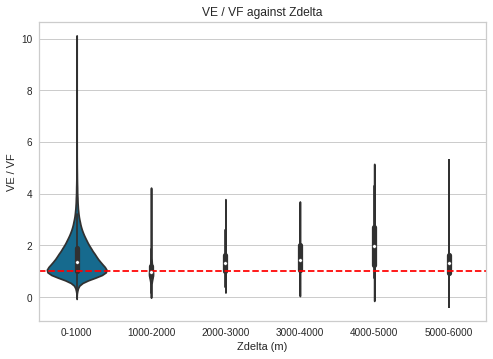

In [17]:
dfr = pd.DataFrame()
for i in range(0, 6000, 1000):
    dft = ref.loc[(ref['Zdelta'].between(i, i + 1000)) & (ref['VE / VF'] <= 10)]
    dft['Zdelta (m)'] = str(i) + '-' + str(i + 1000)
    dfr = pd.concat([dfr, dft])
ax = sns.violinplot(
    x = dfr['Zdelta (m)'],
    y = dfr['VE / VF'],
    scale = 'count'
#     ax = plt.subplot(1,1,(figsize = (10,10)))
)
plt.axhline(y = 1.00, color = 'red', linestyle = '--')
ax.set_title('VE / VF against Zdelta')


Text(0.5, 1.0, 'VE / VF against Cent Lat')

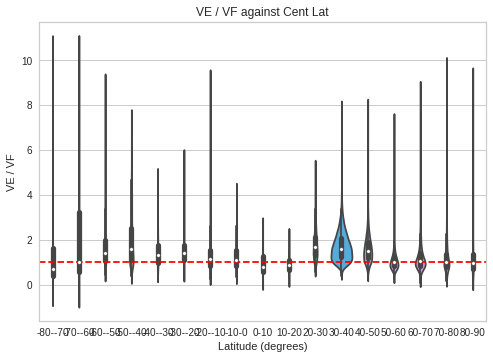

In [18]:
dfr = pd.DataFrame()
for i in range(-90, 100, 10):
    dft = ref.loc[(ref['CenLat'].between(i, i + 10)) & (ref['VE / VF'] <= 10)]
    dft['Latitude (degrees)'] = str(i) + '-' + str(i + 10)
    dfr = pd.concat([dfr, dft])
ax = sns.violinplot(
    x = dfr['Latitude (degrees)'],
    y = dfr['VE / VF'],
    scale = 'count'
#     ax = plt.subplot(1,1,(figsize = (10,10)))
)
plt.axhline(y = 1.00, color = 'red', linestyle = '--')
ax.set_title('VE / VF against Cent Lat')


Text(0.5, 1.0, 'VE / VF against Cent Lon')

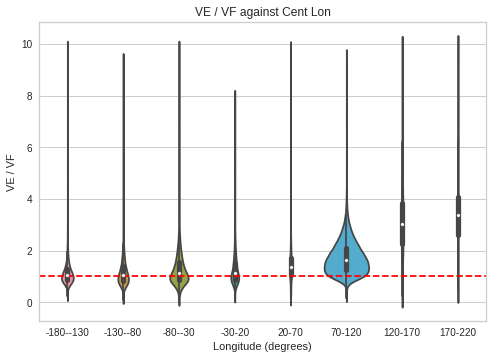

In [19]:
dfr = pd.DataFrame()
for i in range(-180, 190, 50):
    dft = ref.loc[(ref['CenLon'].between(i, i + 50)) & (ref['VE / VF'] <= 10)]
    dft['Longitude (degrees)'] = str(i) + '-' + str(i + 50)
    dfr = pd.concat([dfr, dft])
ax = sns.violinplot(
    x = dfr['Longitude (degrees)'],
    y = dfr['VE / VF'],
    scale = 'count'
#     ax = plt.subplot(1,1,(figsize = (10,10)))
)
plt.axhline(y = 1.00, color = 'red', linestyle = '--')
ax.set_title('VE / VF against Cent Lon')